In [1]:
# ==========================================
# IMPORT LIBRARIESs
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Set plot style
sns.set(style="whitegrid")


In [2]:
# 1. Load Dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("First 10 Rows:")
display(df.head(10))



First 10 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# 2. Inspect Dataset
print("\nData Info:")
print(df.info())
# Data Cleaning (Specific to this dataset)
# 'TotalCharges' is object type because of blank spaces. Coerce to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill missing values (only 11 rows usually) with 0 or mean
df['TotalCharges'].fillna(0, inplace=True)

# 3. Encode Categorical Features
# Drop customerID as it is not a feature
df_clean = df.drop('customerID', axis=1)

# Identify categorical columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

# Label Encoding for binary/ordinal variables, One-Hot for others
# For simplicity in this assignment, we will use Label Encoding for binary (Yes/No)
# and Get Dummies (One Hot) for multi-class like 'PaymentMethod'
le = LabelEncoder()
# 5. Convert Churn to Binary (Doing this early helps with correlation)
df_clean['Churn'] = le.fit_transform(df_clean['Churn'])

# Encode other binary columns
for col in cat_cols:
    if col != 'Churn':
        if df_clean[col].nunique() == 2:
            df_clean[col] = le.fit_transform(df_clean[col])
        else:
            # One-hot encode multi-value columns
            df_clean = pd.get_dummies(df_clean, columns=[col], drop_first=True)
print("\nEncoded Data Info:")
print(df_clean.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

In [4]:
# 4. Normalize/Standardize Numerical Variables
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

print("\nPreprocessing Complete. Data Shape:", df_clean.shape)


Preprocessing Complete. Data Shape: (7043, 31)



--- PART B ---

Summary Statistics:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


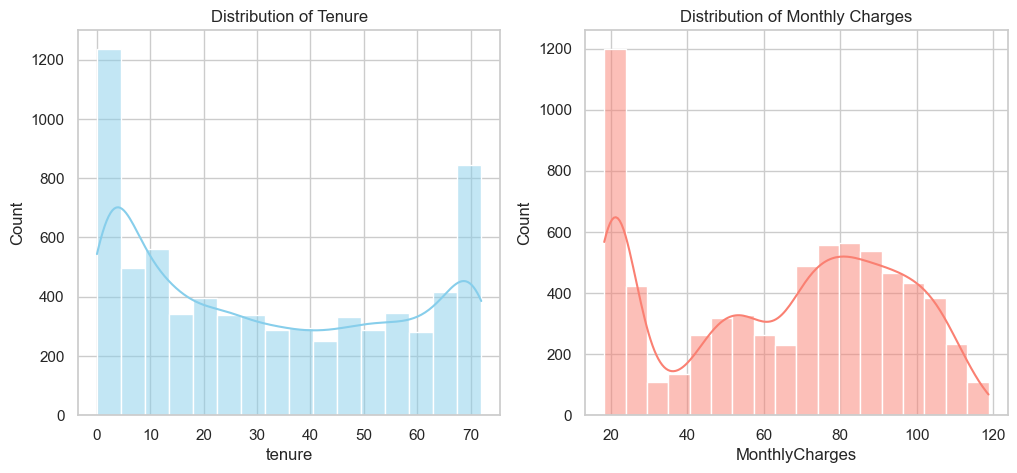

In [5]:
# ==========================================
# PART B: EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================
print("\n--- PART B ---")

# 1. Summary Statistics
print("\nSummary Statistics:")
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# 2. Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')

plt.subplot(1, 2, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.show()

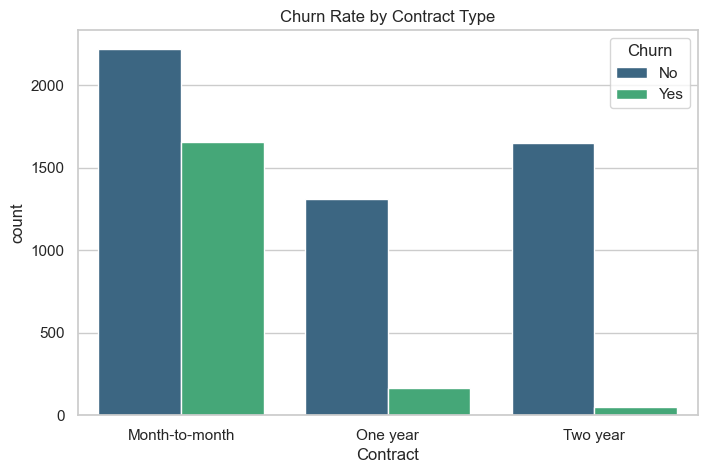

In [6]:
# 3. Bar Chart: Churn by Contract
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.show()

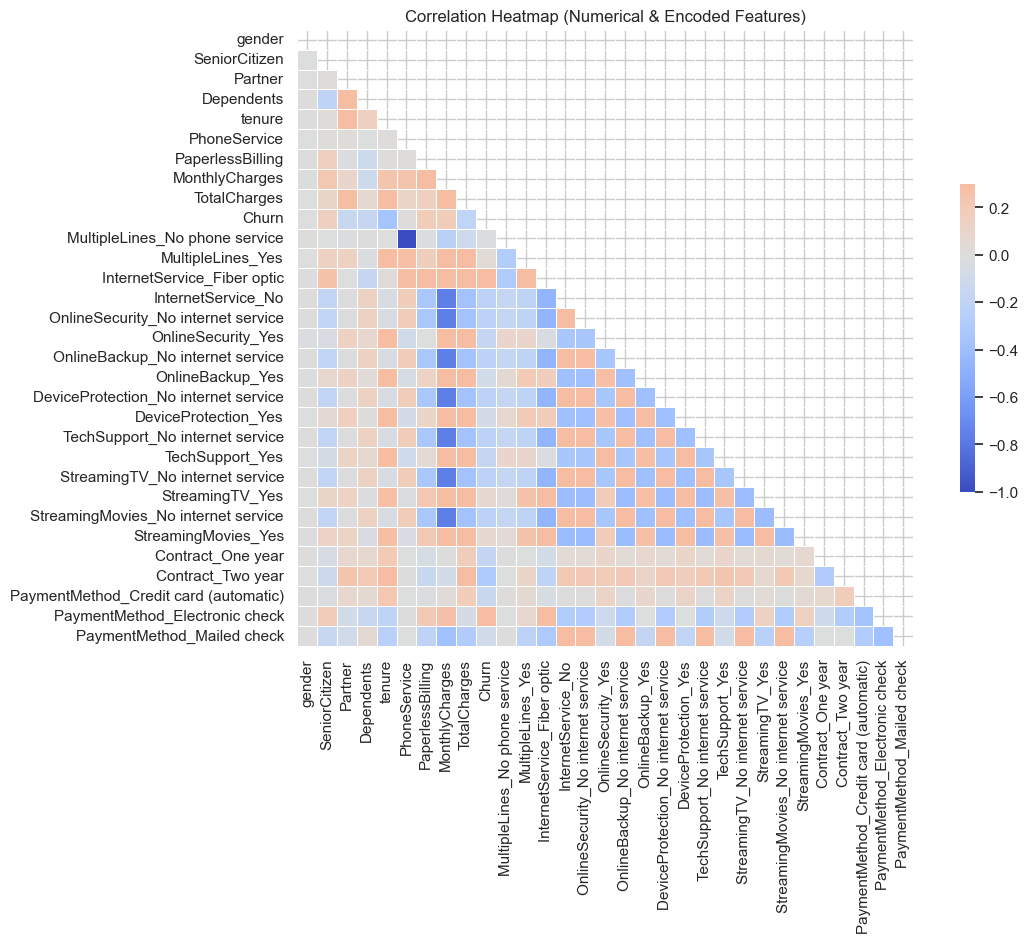

In [7]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
# calculate correlation on the processed numeric dataframe
corr = df_clean.corr()
# Mask upper triangle for better visibility
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap (Numerical & Encoded Features)')
plt.show()

In [8]:
# 5. Interpretation (Printed below)
print("\nB.5 INTERPRETATION:")
print("- Tenure: New customers (low tenure) are more likely to churn.")
print("- Contract: Month-to-month contracts have significantly higher churn than 1 or 2-year contracts.")
print("- MonthlyCharges: Higher monthly charges correlate slightly with higher churn.")


B.5 INTERPRETATION:
- Tenure: New customers (low tenure) are more likely to churn.
- Contract: Month-to-month contracts have significantly higher churn than 1 or 2-year contracts.
- MonthlyCharges: Higher monthly charges correlate slightly with higher churn.


In [9]:
# ==========================================
# PART D: MODELING & EVALUATION
# ==========================================
print("\n--- PART D ---")

# Prepare Data
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train Models
# a. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# b. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



--- PART D ---



--- Logistic Regression Evaluation ---
Accuracy: 0.8211
Precision: 0.6862
Recall: 0.5979
F1 Score: 0.6390

Confusion Matrix:
[[934 102]
 [150 223]]

--- Random Forest Evaluation ---
Accuracy: 0.7942
Precision: 0.6566
Recall: 0.4665
F1 Score: 0.5455

Confusion Matrix:
[[945  91]
 [199 174]]

--- Feature Importance (Random Forest) ---


C:\Users\Maria Kirabo\AppData\Local\Temp\ipykernel_26088\2751727724.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')


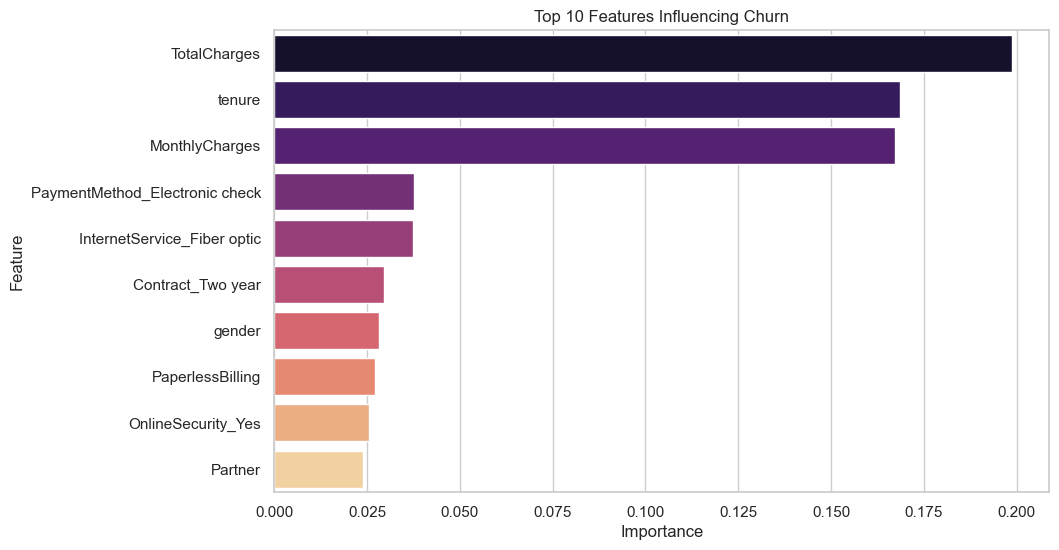

In [10]:
# 2. Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)

# 3. Feature Importance (Random Forest)
print("\n--- Feature Importance (Random Forest) ---")
importances = rf_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')
plt.title('Top 10 Features Influencing Churn')
plt.show()


In [11]:
print("\nD.3 INTERPRETATION:")
print("The most important features are usually 'TotalCharges', 'MonthlyCharges', and 'tenure'.")
print("Contract_Month-to-month is typically the strongest categorical predictor.")




D.3 INTERPRETATION:
The most important features are usually 'TotalCharges', 'MonthlyCharges', and 'tenure'.
Contract_Month-to-month is typically the strongest categorical predictor.


In [12]:
# ==========================================
# EXPORT DATA FOR PART E (POWER BI)
# ==========================================
print("\n--- PREPARING DATA FOR POWER BI ---")

# We want the original readable data + the predictions
dashboard_df = df.copy() # Use original df for readable labels (Male/Female, not 0/1)

# Add predictions to the whole dataset (for visualization purposes)
# Note: In a strict production environment, you only predict on new data,
# but for a dashboard assignment, we visualize the model's understanding of the historical data.
# We need to re-process the whole X to get predictions
X_all = df_clean.drop('Churn', axis=1)

# Get Probability of Churn (0 to 1 score) from Random Forest
dashboard_df['Churn_Probability'] = rf_model.predict_proba(X_all)[:, 1]

# Get Binary Prediction
dashboard_df['Predicted_Churn_Label'] = rf_model.predict(X_all)
dashboard_df['Predicted_Churn'] = dashboard_df['Predicted_Churn_Label'].map({1: 'Yes', 0: 'No'})

# Create a "Risk Segment" column
def get_risk(prob):
    if prob > 0.7: return 'High Risk'
    elif prob > 0.4: return 'Medium Risk'
    else: return 'Low Risk'

dashboard_df['Risk_Segment'] = dashboard_df['Churn_Probability'].apply(get_risk)

# Save to CSV
dashboard_df.to_csv('Telco_Churn_Dashboard_Data.csv', index=False)
feature_df.to_csv('Model_Feature_Importance.csv', index=False)

print("Files created successfully:")
print("1. Telco_Churn_Dashboard_Data.csv (Main dataset)")
print("2. Model_Feature_Importance.csv (For the features chart)")


--- PREPARING DATA FOR POWER BI ---
Files created successfully:
1. Telco_Churn_Dashboard_Data.csv (Main dataset)
2. Model_Feature_Importance.csv (For the features chart)
